In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sector_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector.csv')
stock_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector_stock_data.csv')



In [2]:
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values(by=['Ticker', 'date'], inplace=True)
stock_df.reset_index(drop=True, inplace=True)

In [3]:
test_df=stock_df.copy(deep=True)
test_df['Daily Return'] = test_df.groupby('Ticker')['close'].pct_change()
test_df

,Ticker,close,date,high,low,month,open,volume,Daily Return
0,ADANIENT,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,NaN
1,ADANIENT,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,0.032548
2,ADANIENT,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,0.000568
3,ADANIENT,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,0.004764
4,ADANIENT,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,-0.014325
...,...,...,...,...,...,...,...,...,...
14195,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,-0.004042
14196,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,-0.024440
14197,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,0.016551
14198,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,-0.008630


Volatility analysis complete. Bar chart saved to 'top_10_volatility_bar_chart.png' and data saved to 'top_10_volatility.csv'.


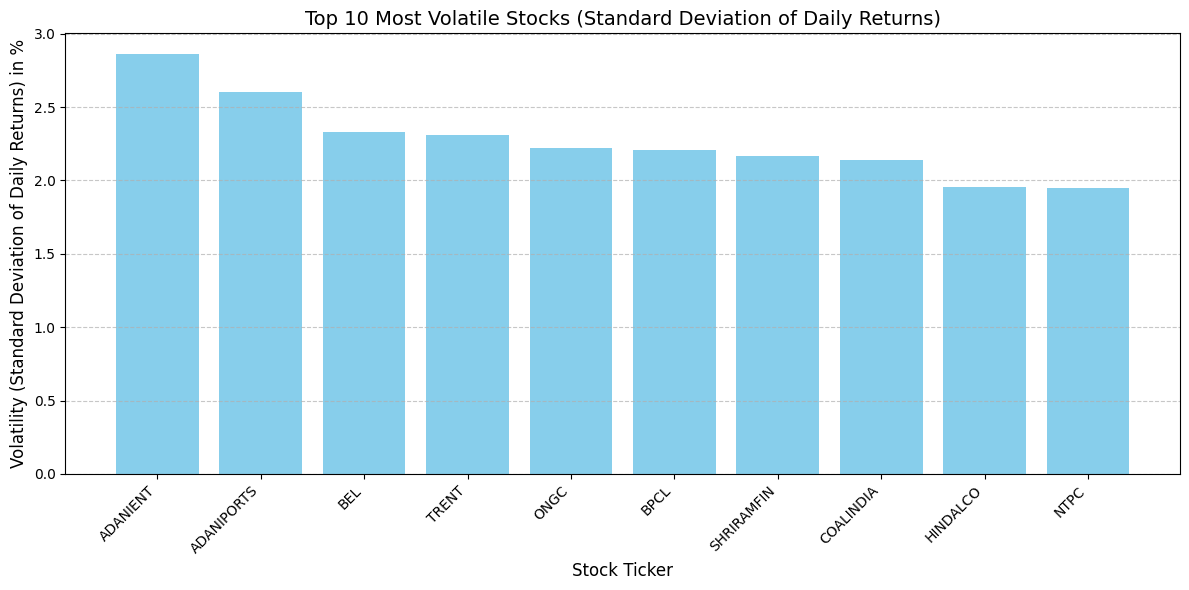

In [4]:
#volatility
stock_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector_stock_data.csv')

stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values(by=['Ticker', 'date'], inplace=True)

stock_df.reset_index(drop=True, inplace=True)
stock_df['Daily Return'] = stock_df.groupby('Ticker')['close'].pct_change()
volatility_df = stock_df.dropna(subset=['Daily Return']).groupby('Ticker')['Daily Return'].std().reset_index()
volatility_df.columns = ['Ticker', 'Volatility']
top_10_volatility = volatility_df.sort_values(by='Volatility', ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_volatility['Volatility_Pct'] = top_10_volatility['Volatility'] * 100
plt.bar(top_10_volatility['Ticker'], top_10_volatility['Volatility_Pct'], color='skyblue')
plt.title('Top 10 Most Volatile Stocks (Standard Deviation of Daily Returns)', fontsize=14)
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Volatility (Standard Deviation of Daily Returns) in %', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('prediction/volatility/top_10_volatility_bar_chart.png')
top_10_volatility[['Ticker', 'Volatility']].to_csv('prediction/volatility/top_10_volatility.csv', index=False)
print("Volatility analysis complete. Bar chart saved to 'top_10_volatility_bar_chart.png' and data saved to 'top_10_volatility.csv'.")

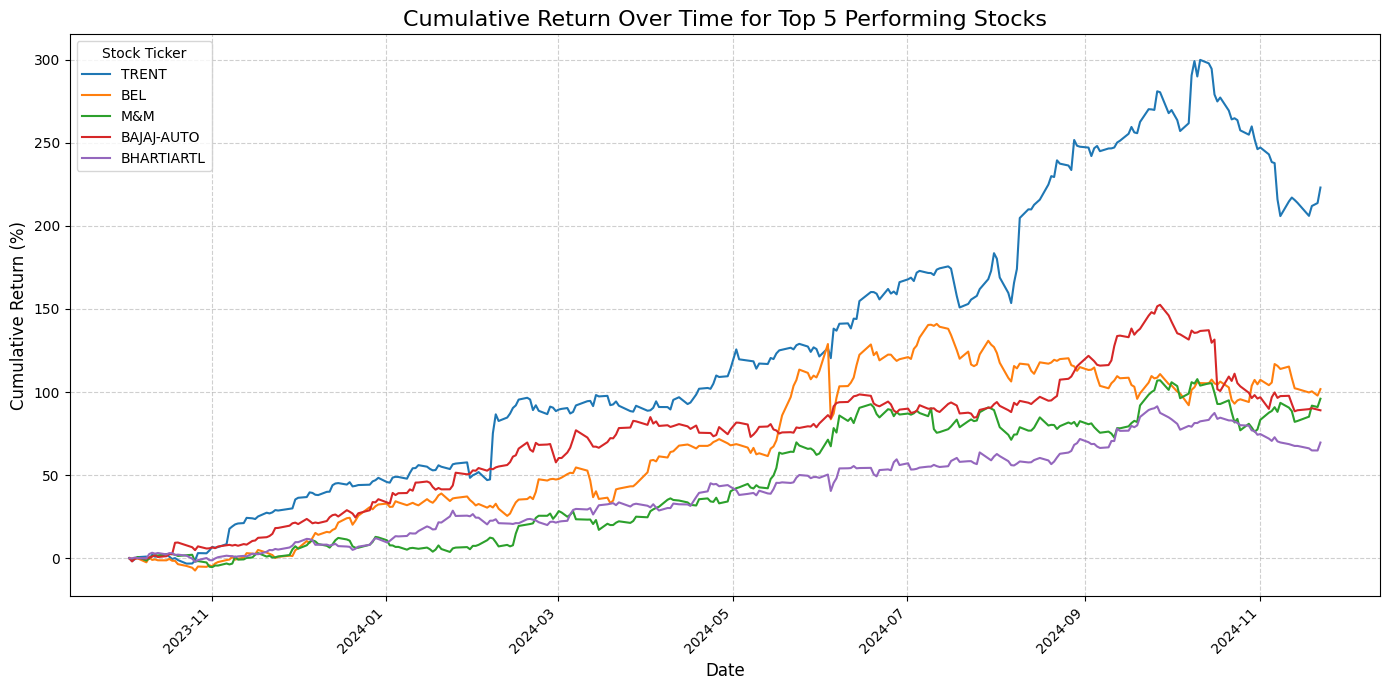

In [5]:
#Cumulative Return
stock_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector_stock_data.csv')

stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values(by=['Ticker', 'date'], inplace=True)
stock_df.reset_index(drop=True, inplace=True)

stock_df['Daily Return'] = stock_df.groupby('Ticker')['close'].pct_change()

daily_return_series = stock_df.groupby('Ticker')['close'].pct_change()
stock_df['Daily Return'] = daily_return_series

cumulative_returns_series = daily_return_series.groupby(stock_df['Ticker']).apply(
    lambda x: (1 + x.fillna(0)).cumprod() - 1
)

stock_df['Cumulative Return'] = cumulative_returns_series.droplevel(0)

final_returns = stock_df.drop_duplicates(subset=['Ticker'], keep='last').sort_values(
    by='Cumulative Return', ascending=False
).head(5)

top_5_tickers = final_returns['Ticker'].tolist()

top_5_df = stock_df[stock_df['Ticker'].isin(top_5_tickers)]

plt.figure(figsize=(14, 7))

for ticker in top_5_tickers:
    ticker_data = top_5_df[top_5_df['Ticker'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['Cumulative Return'] * 100, label=ticker)

plt.title('Cumulative Return Over Time for Top 5 Performing Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(title='Stock Ticker', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('prediction/Cumulative_Return/top_5_cumulative_return_line_chart.png')
final_returns.set_index('Ticker')[['Cumulative Return']].to_csv('prediction/Cumulative_Return/top_5_cumulative_return_final.csv')


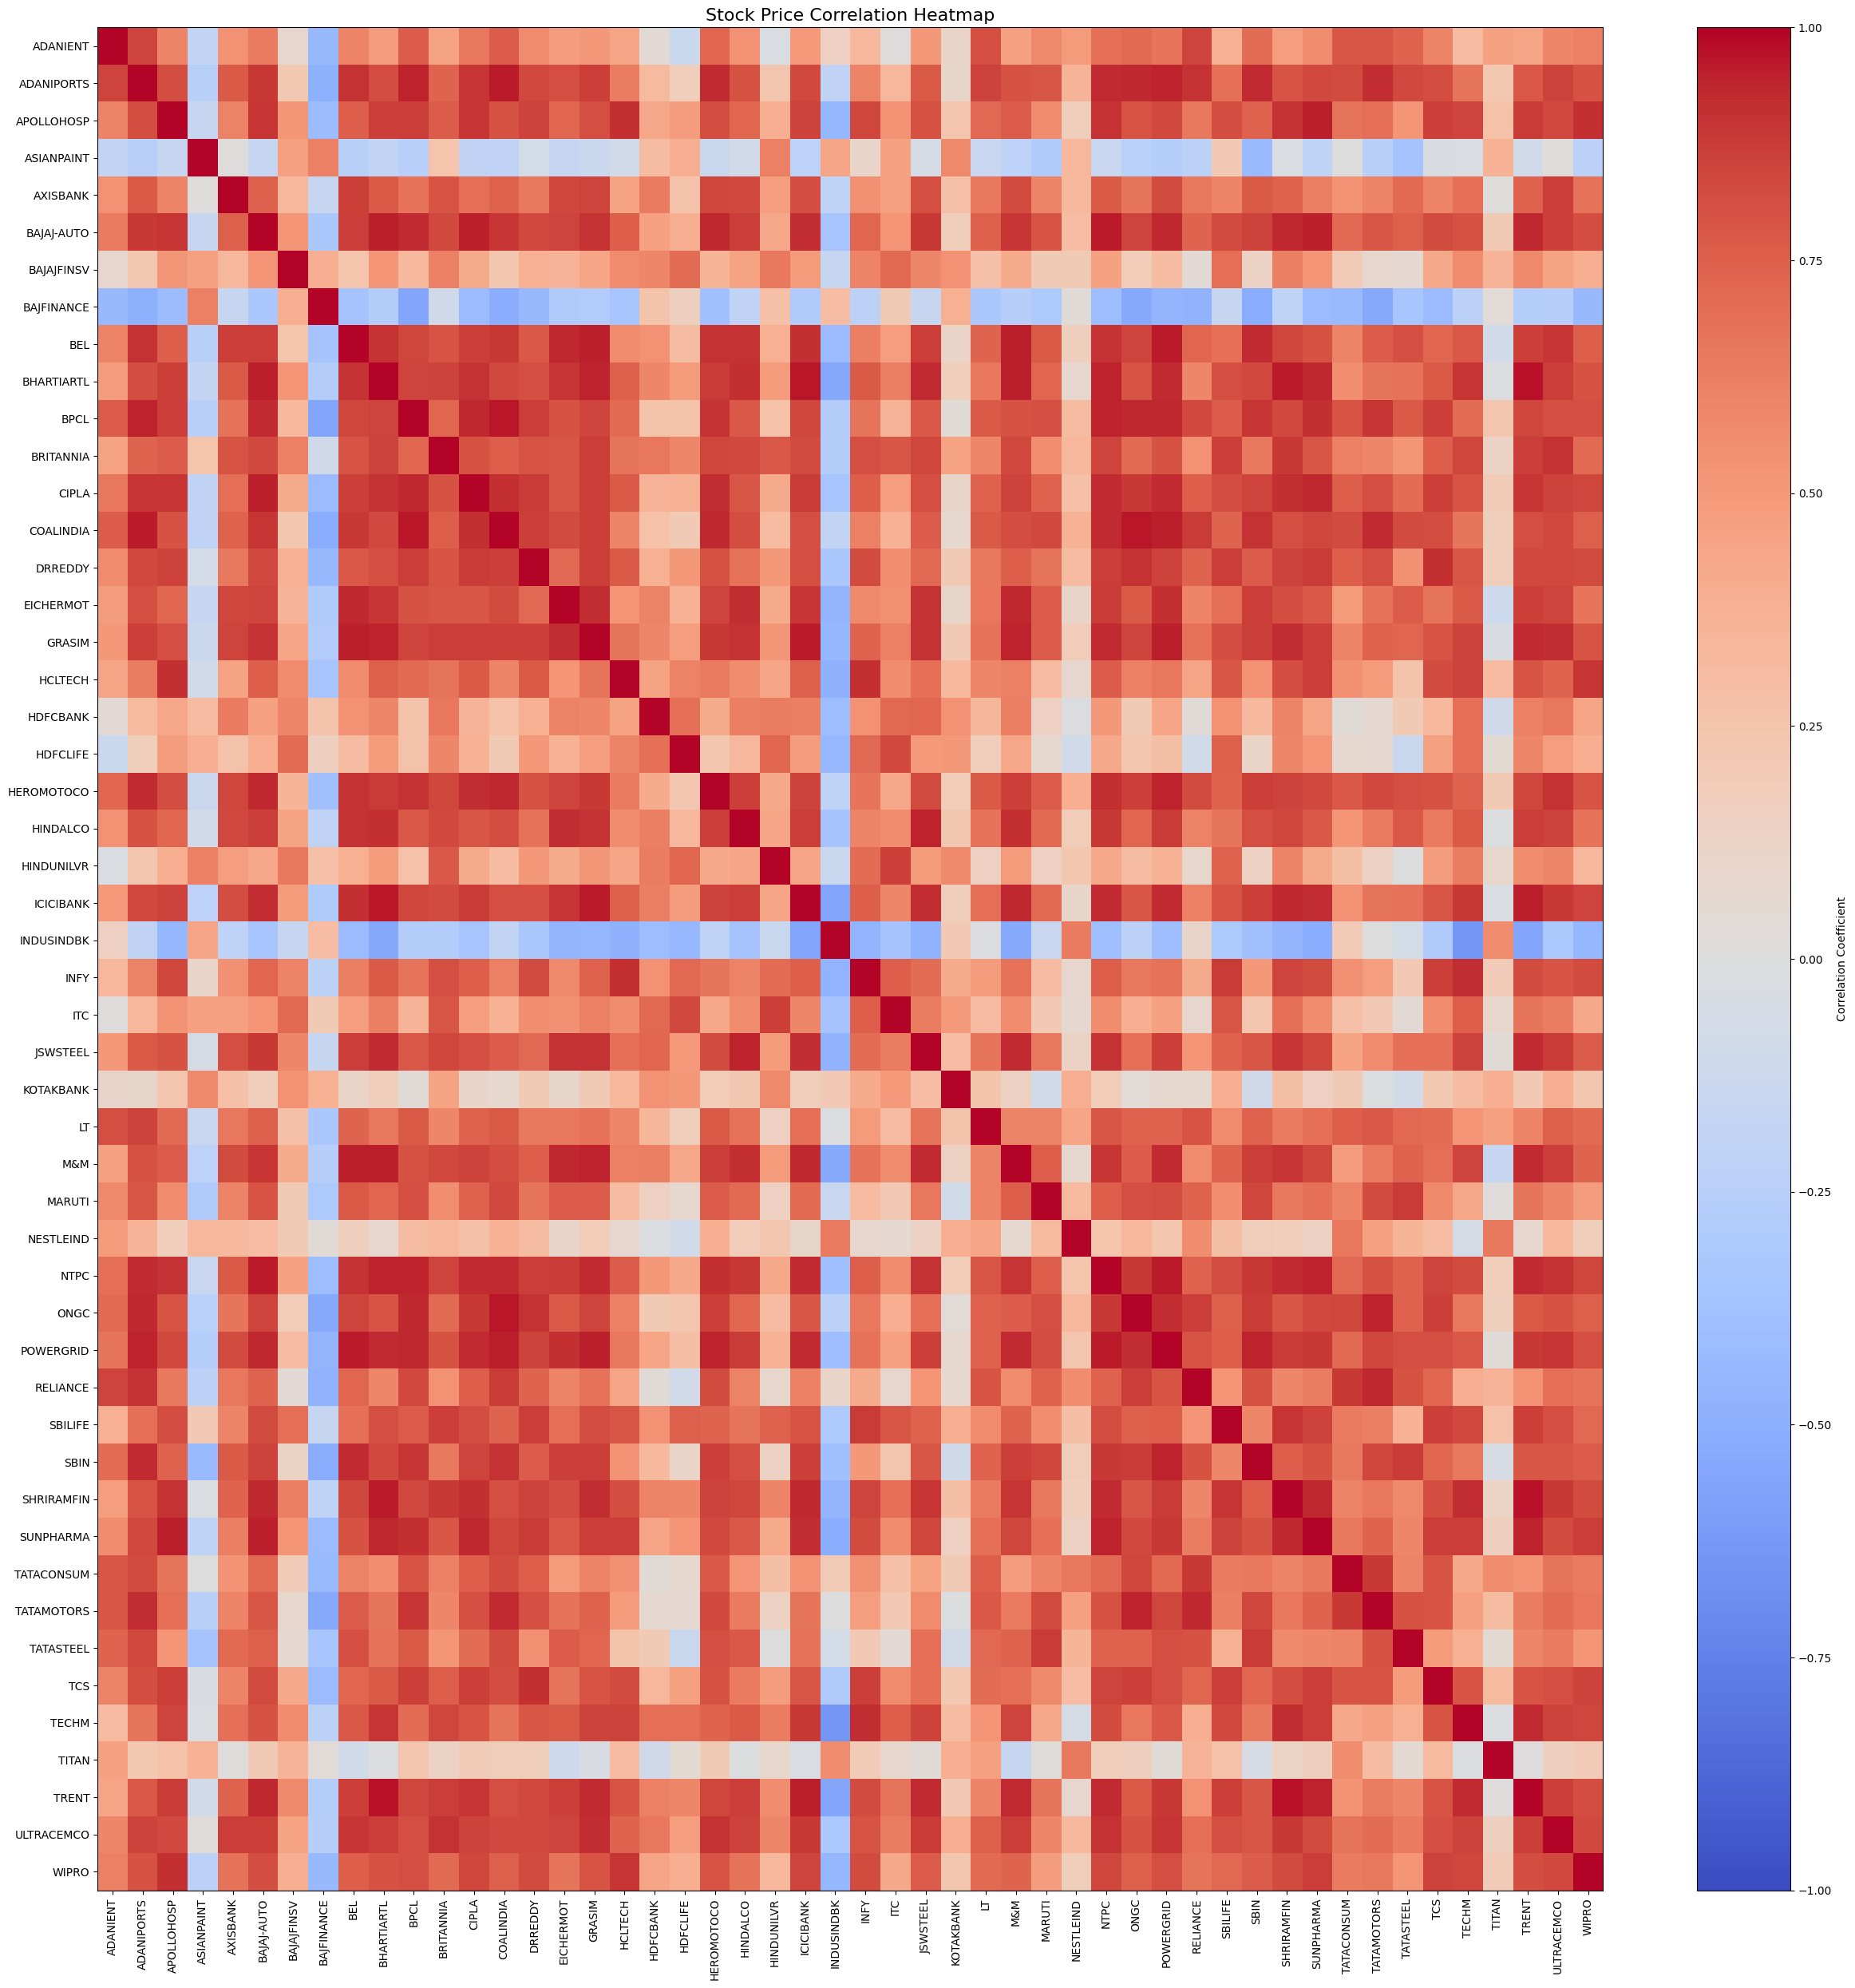

In [6]:
#correlation
import numpy as np

stock_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector_stock_data.csv')

# 2. Prepare data for correlation: Pivot to wide format
# The matrix calculation requires one column per stock (Ticker) and one row per date.
pivot_df = stock_df.pivot_table(index='date', columns='Ticker', values='close')

# 3. Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# 4. Save the correlation matrix
correlation_matrix.to_csv('prediction/stock_correlation_heatmap/stock_correlation_matrix.csv')

# 5. Visualization (Heatmap)
num_tickers = correlation_matrix.shape[0]
fig_size = max(10, num_tickers * 0.5)
plt.figure(figsize=(fig_size, fig_size))

# Create the heatmap using Matplotlib
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

# Set labels for the axes
tickers = correlation_matrix.columns.tolist()
plt.xticks(np.arange(len(tickers)), tickers, rotation=90)
plt.yticks(np.arange(len(tickers)), tickers)

plt.title('Stock Price Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('prediction/stock_correlation_heatmap/stock_correlation_heatmap.png')

In [7]:
#montly top gainers and losers
stock_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector_stock_data.csv')

stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values(by=['Ticker', 'date'], inplace=True)

# Create a YearMonth key for grouping
stock_df['YearMonth'] = stock_df['date'].dt.to_period('M')

# 2. Calculate Monthly Returns
# Find the start and end prices for each Ticker and Month
monthly_prices = stock_df.groupby(['Ticker', 'YearMonth'])['close'].agg(
    start_price='first',
    end_price='last'
).reset_index()

# Calculate the monthly return: (End Price - Start Price) / Start Price
monthly_prices['Monthly Return'] = (monthly_prices['end_price'] - monthly_prices['start_price']) / monthly_prices['start_price']

# Check number of months
unique_months = monthly_prices['YearMonth'].unique()

# 3. Generate Visualization (Top 5 Gainers and Losers per Month)
plot_filenames = []
output_dataframes = {}

for month in unique_months:
    # Filter data for the current month and sort by return
    month_data = monthly_prices[monthly_prices['YearMonth'] == month].sort_values(by='Monthly Return', ascending=False)

    # Identify top 5 gainers and bottom 5 losers
    top_5_gainers = month_data.head(5)
    top_5_losers = month_data.tail(5)

    # Combine top 5 gainers and top 5 losers
    combined_performance = pd.concat([top_5_gainers, top_5_losers]).sort_values(
        by='Monthly Return', ascending=False
    )
    
    # Store combined data for a master CSV at the end
    output_dataframes[month] = combined_performance

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Convert returns to percentage for plotting
    returns_pct = combined_performance['Monthly Return'] * 100
    
    # Set bar colors: Green for gainers (>0), Red for losers (<0)
    colors = ['green' if r > 0 else 'red' for r in returns_pct]
    
    ax.bar(combined_performance['Ticker'], returns_pct, color=colors)
    
    month_label = month.strftime('%Y-%m')
    ax.set_title(f'Top 5 Gainers & Losers: {month_label}', fontsize=14)
    ax.set_xlabel('Stock Ticker', fontsize=12)
    ax.set_ylabel('Monthly Return (%)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plot_filename = f'prediction/monthly_gainers_losers/monthly_gainers_losers_{month_label}.png'
    plt.savefig(plot_filename)
    plt.close(fig) # Close the figure

# 4. Concatenate all monthly dataframes into a single CSV output
all_monthly_performance = pd.concat(output_dataframes.values())
all_monthly_performance = all_monthly_performance[['YearMonth', 'Ticker', 'Monthly Return']].sort_values(by=['YearMonth', 'Monthly Return'], ascending=[True, False])
all_monthly_performance['YearMonth'] = all_monthly_performance['YearMonth'].astype(str) # Convert Period back to string for CSV
all_monthly_performance.to_csv('prediction/monthly_gainers_losers/monthly_top5_gainers_losers_data.csv', index=False)


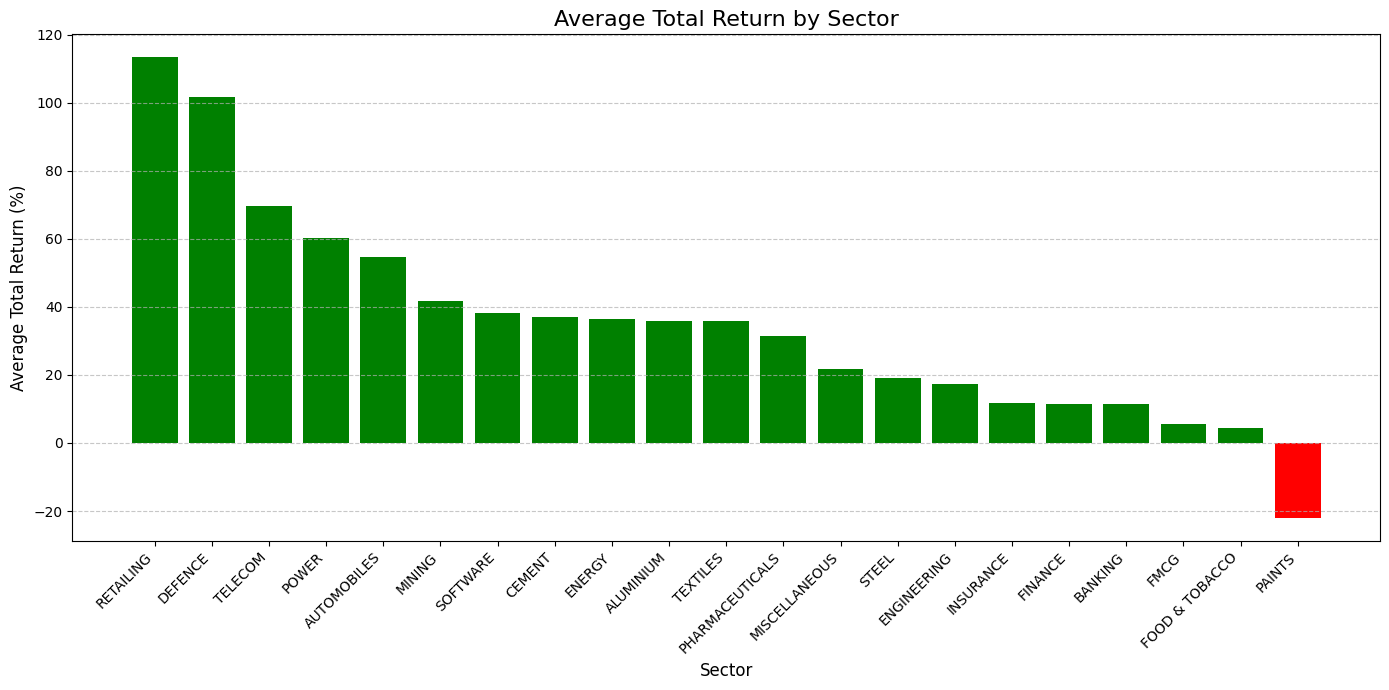

In [8]:
stock_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector_stock_data.csv')
sector_df=pd.read_csv(r'D:\DS_Data Driven Stock Analysis\cleaned_data\sector.csv')

# 2. Prepare Stock Data
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values(by=['Ticker', 'date'], inplace=True)

# 3. Calculate Total Return (Start-to-End Price) per Ticker
total_returns_per_ticker = stock_df.groupby('Ticker')['close'].agg(
    start_price='first',
    end_price='last'
).reset_index()

total_returns_per_ticker['Total Return'] = (total_returns_per_ticker['end_price'] - total_returns_per_ticker['start_price']) / total_returns_per_ticker['start_price']

# 4. Prepare Sector Mapping and Merge
sector_map = sector_df[['Ticker', 'sector']].drop_duplicates()

merged_df = total_returns_per_ticker[['Ticker', 'Total Return']].merge(
    sector_map, on='Ticker', how='left'
)

# Handle cases where a Ticker might not be mapped
merged_df.dropna(subset=['sector'], inplace=True)

# 5. Calculate Average Sector Performance (Average Total Return)
sector_performance = merged_df.groupby('sector')['Total Return'].mean().sort_values(ascending=False).reset_index()
sector_performance.columns = ['Sector', 'Average Total Return']

# 6. Save the data to CSV
sector_performance.to_csv('prediction/sector_return/average_sector_return_data.csv', index=False)

# 7. Visualization (Bar Chart)
plt.figure(figsize=(14, 7))

sector_performance['Average Return (%)'] = sector_performance['Average Total Return'] * 100

colors = ['green' if x >= 0 else 'red' for x in sector_performance['Average Return (%)']]

plt.bar(sector_performance['Sector'], sector_performance['Average Return (%)'], color=colors)

plt.title('Average Total Return by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Total Return (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('prediction/sector_return/average_sector_return_bar_chart.png')